In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../')
import retrieval_functions as rf

import importlib
importlib.reload(rf)
rf.init_plotting()


In [2]:
experiment="03_Share"
data=[]
for framework in ["HPMPC","MPyC","MP-SPDZ","MOTION"]:
    path= "..\..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [3]:
bandwidth,label=rf.get_bandwidth_deviation(data)
latency,label=rf.get_latency_deviation(data)
packetdrop,label=rf.get_packetdrop_deviation(data)

In [4]:
label

['HPMPC passive adversary 44',
 'MPyC',
 'MP-SPDZ replicated-field 1000000',
 'MP-SPDZ semi2k 1000000',
 'MP-SPDZ replicated-ring 1000000',
 'MP-SPDZ ps-rep-ring 1000000',
 'MOTION arithmetic_gmw',
 'MOTION boolean_gmw']

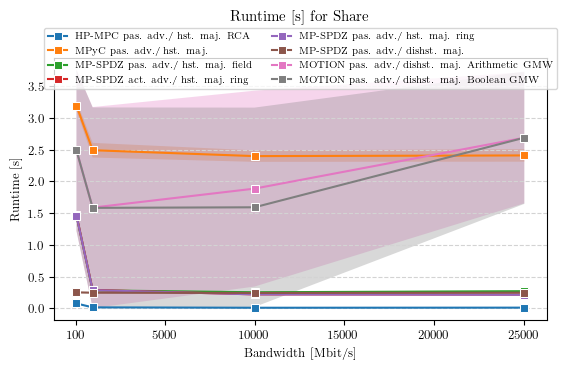

In [8]:
bandwidth[3],bandwidth[5]=bandwidth[5],bandwidth[3]
label[0]="HP-MPC pas. adv./ hst. maj. RCA"
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ pas. adv./ hst. maj. field"
label[3]="MP-SPDZ act. adv./ hst. maj. ring"
label[4]="MP-SPDZ pas. adv./ hst. maj. ring"
label[5]="MP-SPDZ pas. adv./ dishst. maj."
label[6]="MOTION pas. adv./ dishst. maj. Arithmetic GMW"
label[7]="MOTION pas. adv./ dishst. maj. Boolean GMW"
rf.plot_deviation_bandwidth(bandwidth,label,"Share_Bandwidth_dev.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",False,x_ticks=[100,5000,10000,15000,20000,25000],right_push=0.5)

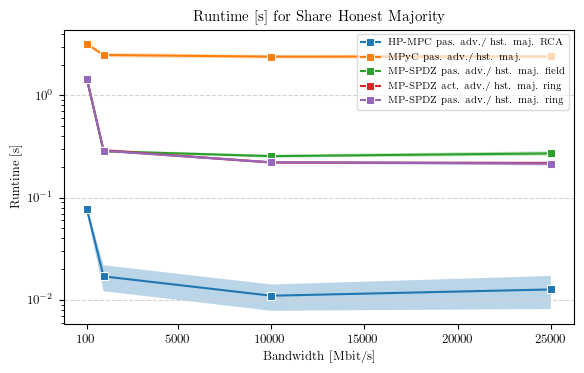

In [10]:
bandwidth_honest = [x for i, x in enumerate(bandwidth) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(bandwidth_honest,label_honest,"Bandwidth_dev_honest.png",experiment+" Honest Majority","Bandwidth [Mbit/s]","Runtime [s]",True,x_ticks=[100,5000,10000,15000,20000,25000])

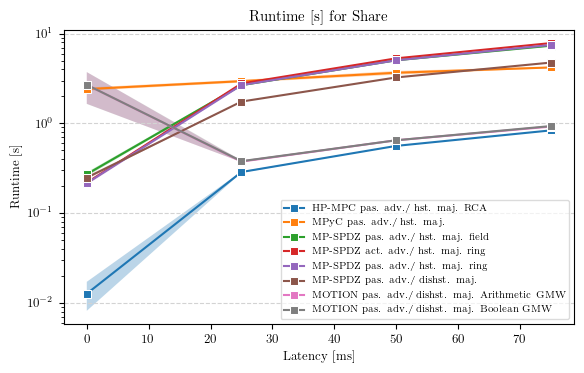

In [11]:
latency[3],latency[5]=latency[5],latency[3]
label[0]="HP-MPC pas. adv./ hst. maj. RCA"
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ pas. adv./ hst. maj. field"
label[3]="MP-SPDZ act. adv./ hst. maj. ring"
label[4]="MP-SPDZ pas. adv./ hst. maj. ring"
label[5]="MP-SPDZ pas. adv./ dishst. maj."
label[6]="MOTION pas. adv./ dishst. maj. Arithmetic GMW"
label[7]="MOTION pas. adv./ dishst. maj. Boolean GMW"
rf.plot_deviation(latency,label,"Share_Latency_dev.png",experiment,"Latency [ms]","Runtime [s]",True)

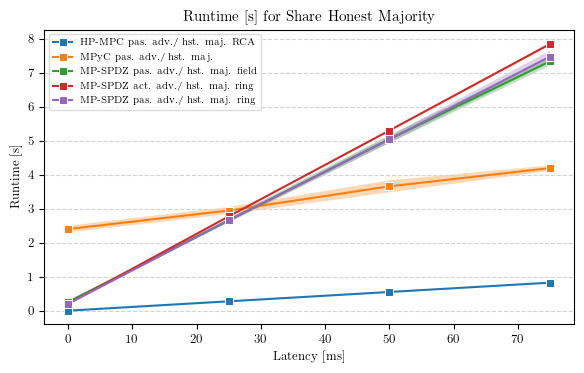

In [12]:
latency_honest = [x for i, x in enumerate(latency) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(latency_honest,label_honest,"Latency_dev_honest.png",experiment+" Honest Majority","Latency [ms]","Runtime [s]",False)

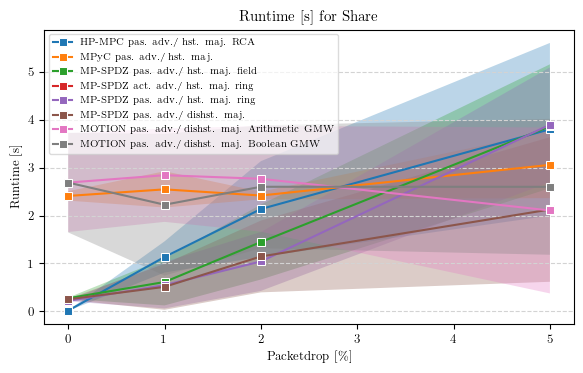

In [24]:
packetdrop[3],packetdrop[5]=packetdrop[5],packetdrop[3]
label[0]="HP-MPC pas. adv./ hst. maj. RCA"
label[1]="MPyC pas. adv./ hst. maj."
label[2]="MP-SPDZ pas. adv./ hst. maj. field"
label[3]="MP-SPDZ act. adv./ hst. maj. ring"
label[4]="MP-SPDZ pas. adv./ hst. maj. ring"
label[5]="MP-SPDZ pas. adv./ dishst. maj."
label[6]="MOTION pas. adv./ dishst. maj. Arithmetic GMW"
label[7]="MOTION pas. adv./ dishst. maj. Boolean GMW"
rf.plot_deviation(packetdrop,label,"Share_Packetdrop_dev.png",experiment,"Packetdrop [\%]","Runtime [s]",False)

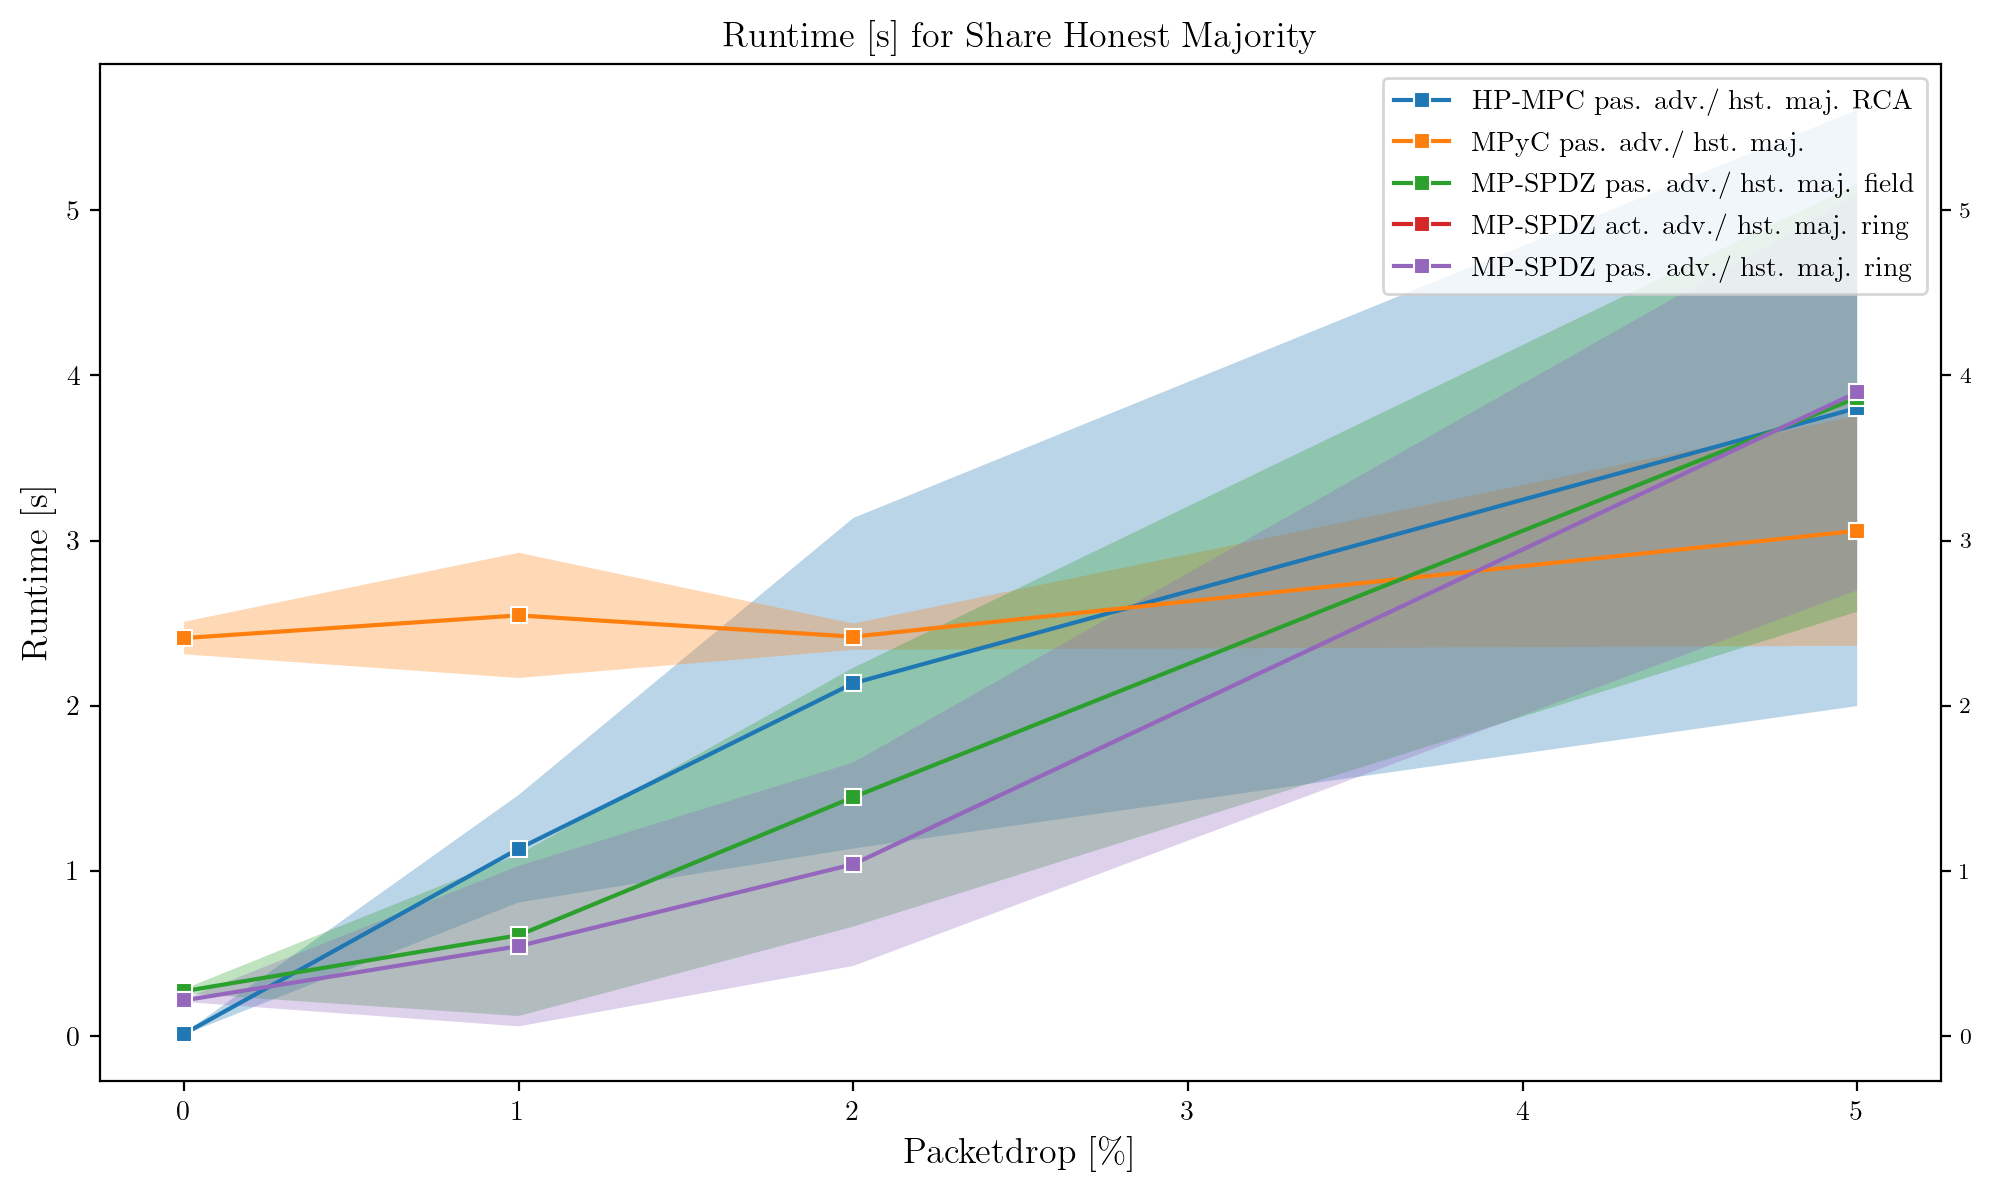

In [82]:
packetdrop_honest = [x for i, x in enumerate(packetdrop) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(packetdrop_honest,label_honest,"Mult_Packetdrop_dev_honest.png",experiment+" Honest Majority","Packetdrop [\%]","Runtime [s]",False)



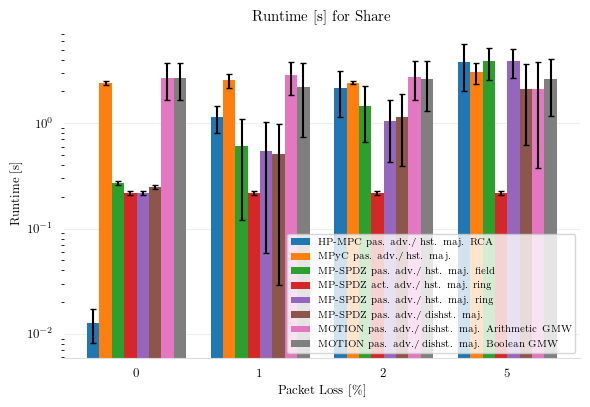

In [26]:
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(4)*4  # Adjust the first parameter to center the bars

bar_list=[]
for i in range(len(packetdrop)):
    bar_list.append(ax.bar(ind - 1.4 + i * width, packetdrop[i]['mean'], width, yerr=packetdrop[i]['std'], label=label[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_yscale('log')
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Packet Loss [\%]')
ax.set_title('Runtime [s] for Share')
ax.set_xticks(ind)
ax.set_xticklabels((packetdrop[1]['packetdrops(%)']))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend()
ax.figure.set_size_inches(5.91, 4)
plt.savefig(experiment+'_packetdrop_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [19]:
latency,label=rf.get_latency_deviation(data)
label[0]="HP-MPC \n pas. adv./ hst. maj. RCA"
label[1]="MPyC \n pas. adv./ hst. maj."
label[2]="MP-SPDZ \n pas. adv./ hst. maj. field"
label[3]="MP-SPDZ \n act. adv./ hst. maj. ring"
label[4]="MP-SPDZ \n pas. adv./ hst. maj. ring"
label[5]="MP-SPDZ \n pas. adv./ dishst. maj."
label[6]="MOTION \n pas. adv./ dishst. maj. Arithm. GMW"
label[7]="MOTION \n pas. adv./ dishst. maj. Bool. GMW"

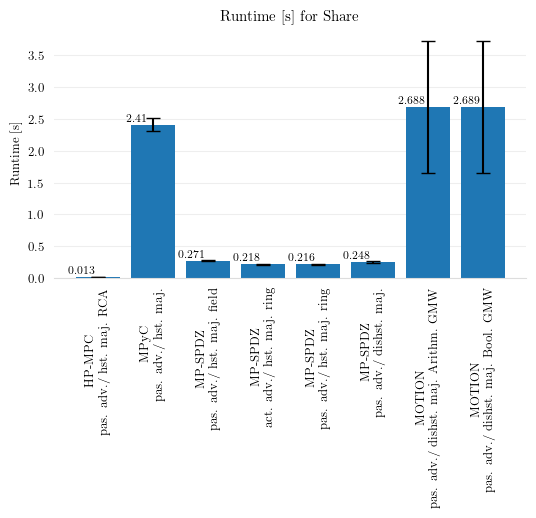

In [21]:

y_label="Runtime [s]"
titel="Runtime [s] for Share"
x_label="Protocols"
mean_values = [round(df['mean'].iloc[0],3) for df in latency]
std_values = [round(df['std'].iloc[0],3) for df in latency]
mean_values[3],mean_values[5]=mean_values[5],mean_values[3]
std_values[3],std_values[5]=std_values[5],std_values[3] 
fig, ax = plt.subplots()
#ax.set_yscale('log')  # Set y-axis as logarithmic
bars=ax.bar(label, mean_values,yerr=std_values,capsize=5)
ax.set_ylabel(y_label)
ax.set_title(titel)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
# Rotate labels
# Add values on top of bars
for i,bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 -0.3, yval + 0.02, yval, ha='center', va='bottom',weight='bold',fontsize=8)
ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [62]:
y_values = []
labels = []
data_box = data
for i in range(len(data_box)):
    if(data_box[i]['framework'][0] in 'HPMPC'):
        for function in data_box[i]['function'].unique():
            y_values.append(data_box[i].loc[(data_box[i]['function'] == function)& (data_box[i]['bandwidths(Mbs)'] == 25000) & (data_box[i]['packetdrops(%)'] == 0) & (data_box[i]['latencies(ms)'] == 0),'runtime_external(s)'].reset_index(drop=True) )
    elif(data_box[i]['framework'][0] in 'MPyC'):
        y_values.append(data_box[i].loc[ (data_box[i]['bandwidths(Mbs)'] == 25000) & (data_box[i]['packetdrops(%)'] == 0) & (data_box[i]['latencies(ms)'] == 0),'runtime_external(s)'].reset_index(drop=True) )
    elif(data_box[i]['framework'][0] in 'MOTION'):
        for protocol in data_box[i]['protocol'].unique():
            y_values.append(data_box[i].loc[ (data_box[i]['protocol']==protocol)&(data_box[i]['bandwidths(Mbs)'] == 25000) & (data_box[i]['packetdrops(%)'] == 0) & (data_box[i]['latencies(ms)'] == 0),'runtime_external(s)'].reset_index(drop=True))
    else:
        for protocol in data_box[i]['protocol'].unique():
            if protocol not in ["ps-rep-field","sy-rep-field","malicious-rep-field"]:
                print(protocol)
                y_values.append(data_box[i].loc[(data_box[i]['protocol']==protocol)&(data_box[i]['bandwidths(Mbs)'] == 25000) & (data_box[i]['packetdrops(%)'] == 0) & (data_box[i]['latencies(ms)'] == 0),'runtime_external(s)'].reset_index(drop=True))

replicated-field
semi2k
replicated-ring
ps-rep-ring


In [65]:
df=pd.DataFrame(y_values).T

In [70]:
df=df.dropna()

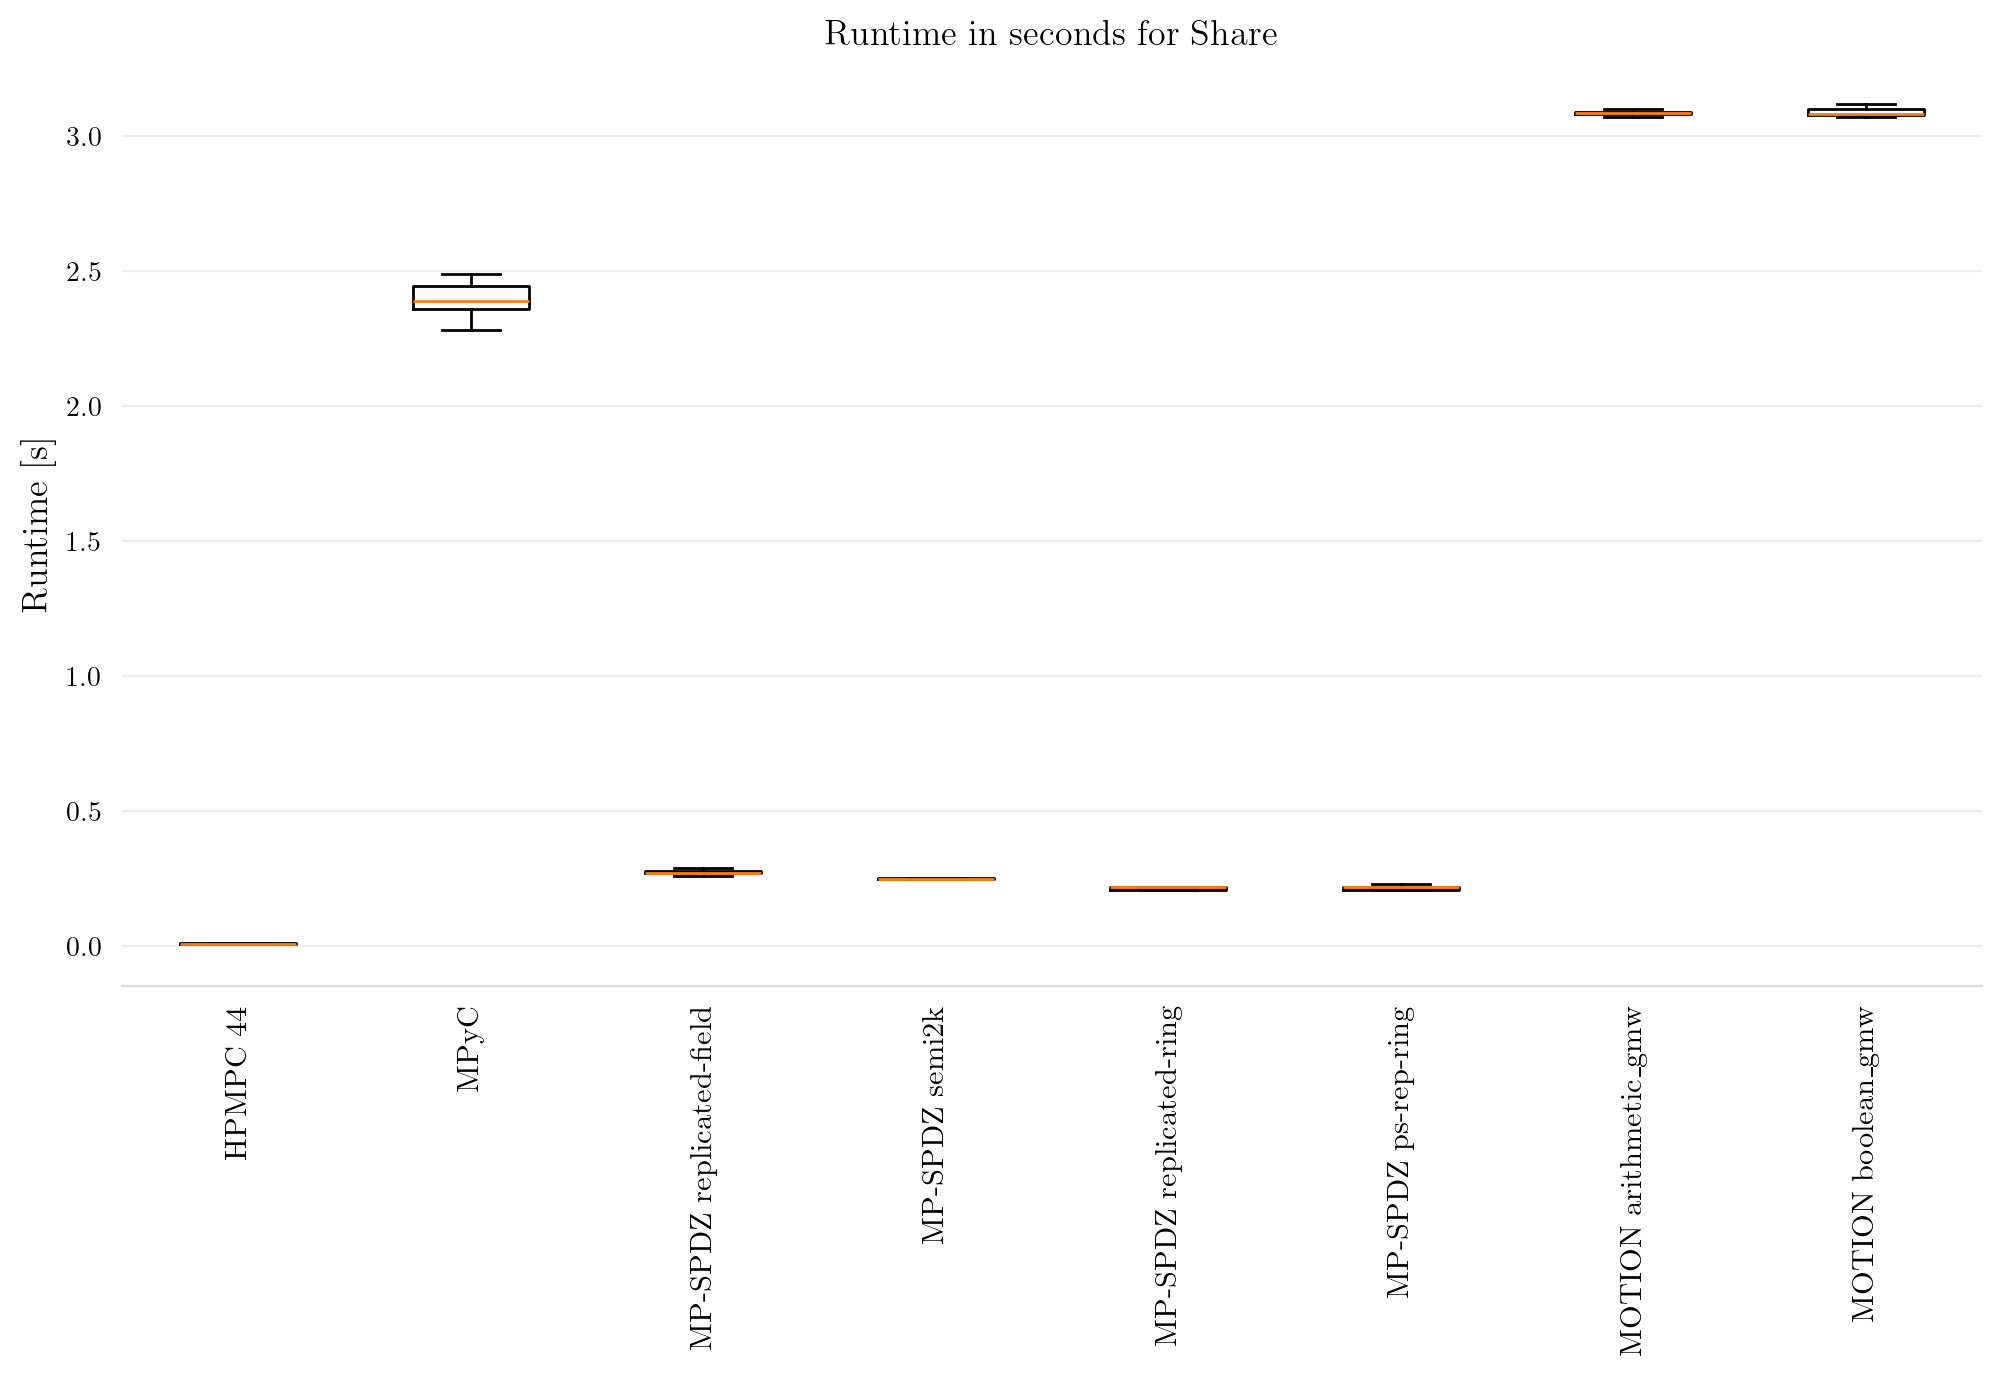

In [72]:
fig, ax = plt.subplots()

# Create boxplot
boxplot = ax.boxplot(df ,labels=label, showfliers=False)

# Set labels and title
ax.set_ylabel(y_label, fontsize=13)
ax.set_title(titel, fontsize=13)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Remove ticks
ax.tick_params(bottom=False, left=False, labelsize=10)

# Add horizontal grid
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Rotate x-axis labels
plt.xticks(rotation='vertical', fontsize=11)

# Set figure size
fig.set_size_inches(12, 6)

# Save figure
plt.savefig(experiment+'_box.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

C:\Users\q533604\AppData\Local\Temp\ipykernel_16956\330653243.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
C:\Users\q533604\AppData\Local\Temp\ipykernel_16956\330653243.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std())
C:\Users\q533604\AppData\Local\Temp\ipykernel_16956\330653243.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].mean())
C:\Users\q533604\AppData\Local\Temp\ipykernel_

[4.03, 355.55, 41.56, 42.14, 41.38, 42.27, 75.17, 51.55]


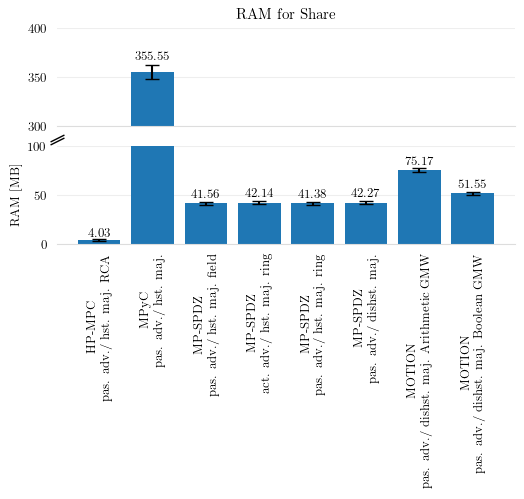

In [23]:
def plot_ram_bar(data,experiment,frameworks):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    values=[]
    label=[]
    error=[]
    for i in range(len(data)):
        if data[i]['framework'][0] == "HPMPC":
            for function in data[i]['function'].unique():
                date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
                err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std())
                values.append(round(date,2))
                error.append(round(err,2))
                label.append(frameworks[i] + ' honest majority')
        elif data[i]['framework'][0] in ["MP-SPDZ","MOTION"]:
            for protocol in data[i]['protocol'].unique():
                if protocol not in ["ps-rep-field","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                    date = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].mean())
                    err = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].std())
                    values.append(round(date,2))
                    error.append(round(err,2))
                    label.append(frameworks[i]+' '+str(protocol))
        else:
            date = float(data[i]['peakRAM(MiB)'].mean())
            err = float(data[i]['peakRAM(MiB)'].std())
            values.append(round(date,2))
            error.append(round(err,2))
            label.append(frameworks[i])
    label[0]="HP-MPC \n pas. adv./ hst. maj. RCA"
    label[1]="MPyC \n pas. adv./ hst. maj."
    label[2]="MP-SPDZ \n pas. adv./ hst. maj. field"
    label[3]="MP-SPDZ \n act. adv./ hst. maj. ring"
    label[4]="MP-SPDZ \n pas. adv./ hst. maj. ring"
    label[5]="MP-SPDZ \n pas. adv./ dishst. maj."
    label[6]="MOTION \n pas. adv./ dishst. maj. Arithmetic GMW"
    label[7]="MOTION \n pas. adv./ dishst. maj. Boolean GMW"
    #ax.set_yscale('log')  # Set y-axis as logarithmic
    print(values)
    bars=ax1.bar(label,values,yerr=error,capsize=5)
    bars2=ax2.bar(label,values,yerr=error,capsize=5)
    ax2.set_ylabel('RAM [MB]')
    ax1.set_title('RAM for Share')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax1.tick_params(bottom=False, left=False)
    ax2.tick_params(bottom=False, left=False)
    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(True, color='#EEEEEE')
    ax1.xaxis.grid(False)
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(True, color='#EEEEEE')
    ax2.xaxis.grid(False)
    # Rotate labels
    ax1.set_ylim(300,400)
    ax2.set_ylim(0,100)
    # Add values on top of bars
    for bar in bars2[:1]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval  +0.5, yval, ha='center', va='bottom',weight='bold')
    yval = bars[1].get_height()
    plt.text(bars[1].get_x() + bars[-1].get_width()/2, yval-170 + 0.05, yval, ha='center', va='bottom',weight='bold')
    for bar in bars2[2:]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval  +3.5, yval, ha='center', va='bottom',weight='bold')
    # zoom-in / limit the view to different portions of the data
    ax1.tick_params(axis='y')
    ax2.tick_params(axis='y')
    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([-0.15], transform=ax1.transAxes, **kwargs)
    ax2.plot([1.08], transform=ax2.transAxes, **kwargs)
    ax1.figure.set_size_inches(5.91, 2.8)
    ax2.figure.set_size_inches(5.91, 2.8)
    plt.xticks(rotation='vertical')
    plt.savefig(experiment+'_RAM_bar.png',dpi=300,bbox_inches='tight')
    plt.show()
plot_ram_bar(data,experiment,["HPMPC","MPyC","MP-SPDZ","MOTION"])